In [10]:
include("settings.jl")

  Activating project at `~/Documents/Github/LocomotionControl`


# Compare kinematics

Compare movement kinematics for baseline, CUN and MOs recordings.

## Bouts data
Look at bouts only

In [2]:
baseline = convert(DataFrame, py"get_bouts('outbound', baseline=True)");
mos = convert(DataFrame, py"get_bouts('outbound', baseline=False, target='MOs')");
MRN = convert(DataFrame, py"get_bouts('outbound', baseline=False, target='CUN/GRN')");

println(size(baseline), size(mos), size(MRN))

(1075, 22)(220, 25)(54, 25)


In [3]:
_, X_bl, Y_bl, S_bl, A_bl, T_bl, D_bl = stack_kinematic_variables(baseline)
_, X_mos, Y_mos, S_mos, A_mos, T_mos, D_mos = stack_kinematic_variables(mos)
_, X_mrn, Y_mrn, S_mrn, A_mrn, T_mrn, D_mrn = stack_kinematic_variables(MRN);

baseline


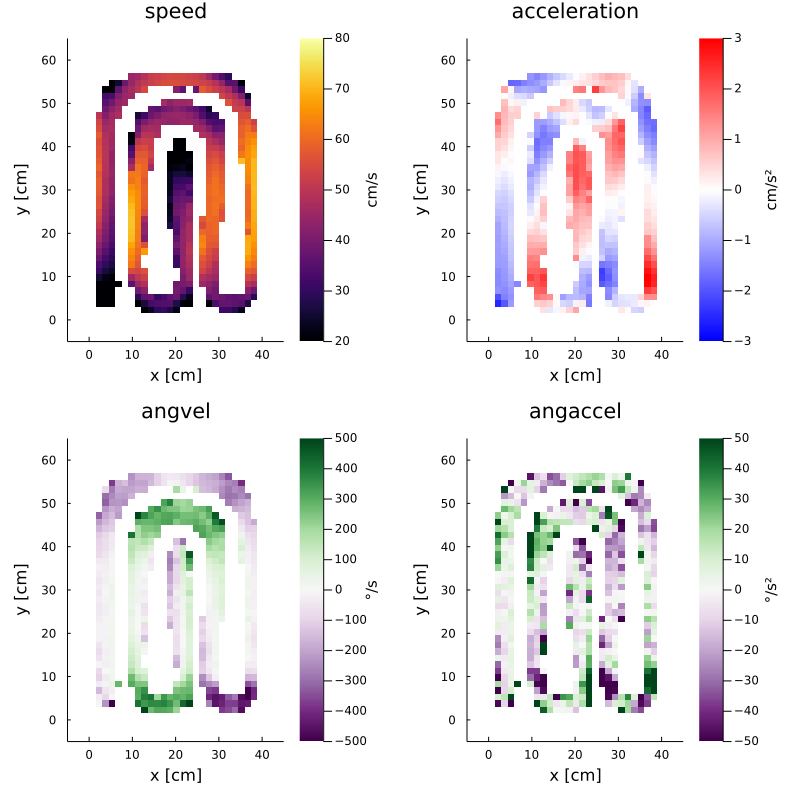

In [4]:
println("baseline")
kinematics_heatmaps(X_bl, Y_bl, S_bl, A_bl, T_bl, D_bl; stepsize=1.5)

MOs


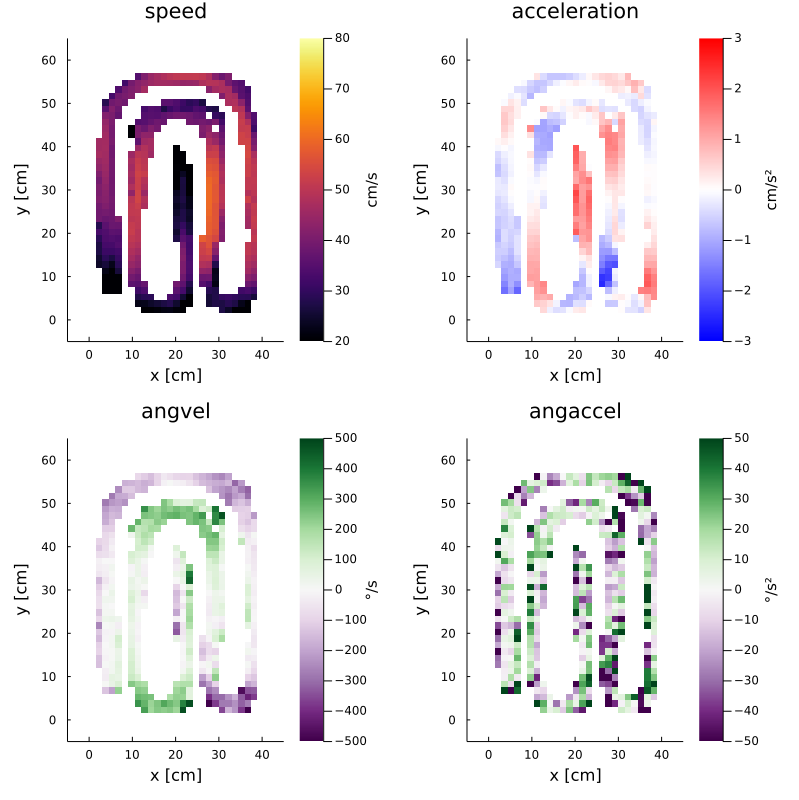

In [5]:
println("MOs")
kinematics_heatmaps(X_mos, Y_mos, S_mos, A_mos, T_mos, D_mos; stepsize=1.5)

CUN


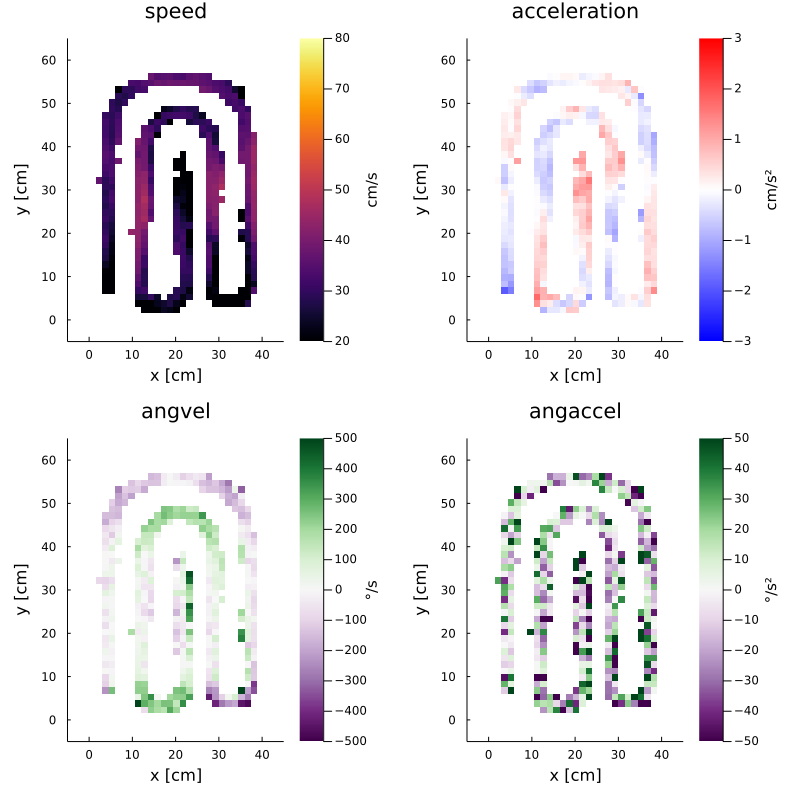

In [6]:
println("CUN")
kinematics_heatmaps(X_mrn, Y_mrn, S_mrn, A_mrn, T_mrn, D_mrn; stepsize=1.5)

Plot KDE visualization of variables values

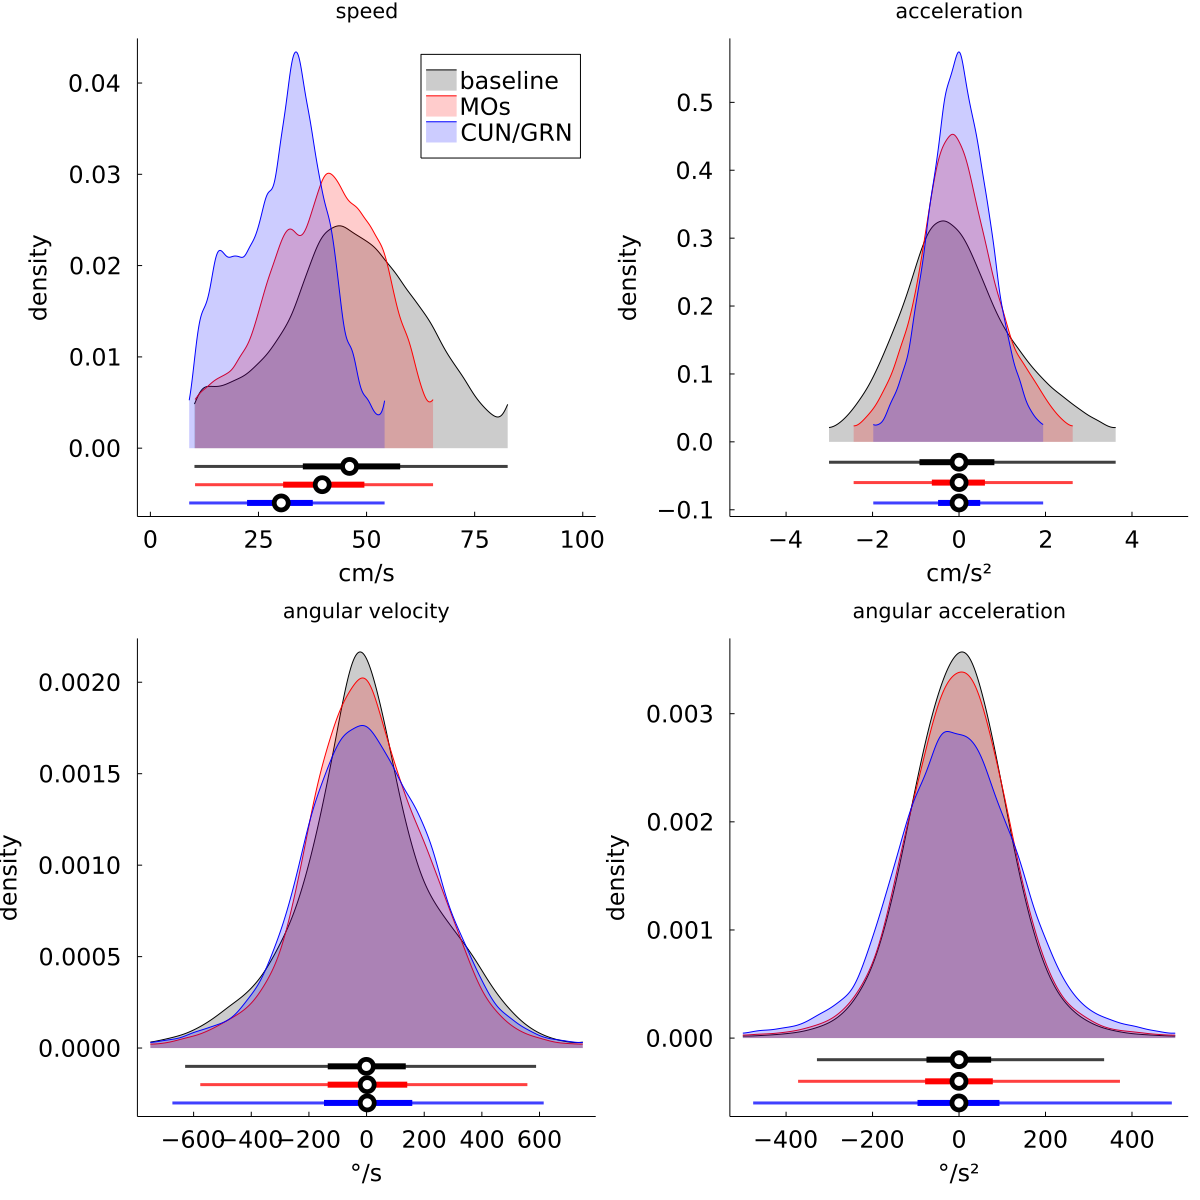

In [12]:
speed_plot = plot(title="speed",  ylabel="density", xlabel="cm/s", grid=false, xlim=[0, 100])
accel_plot = plot(title="acceleration",  ylabel="density", xlabel="cm/s²", grid=false, xlim=[-5, 5])
angvel_plot = plot(title="angular velocity",  ylabel="density", xlabel="°/s", grid=false,)
angaccel_plot = plot(title="angular acceleration",  ylabel="density", xlabel="°/s²", grid=false,)

colors = (:black, :red, :blue)
blvars = (S_bl, A_bl, T_bl, D_bl)
mosvars = (S_mos, A_mos, T_mos, D_mos)
mrnvars = (S_mrn, A_mrn, T_mrn, D_mrn)


for (i, (color, (S, A, T, D), lbl)) in enumerate(zip(colors, (blvars, mosvars, mrnvars), ("baseline", "MOs", "CUN/GRN")))
    plot_density!(speed_plot, S, color=color, label=lbl, y=-0.002 * i)
    plot_density!(accel_plot, A, color=color, label=nothing, y = -0.03 * i)
    plot_density!(angvel_plot, T, color=color, label=nothing, boundary=(-750, 750), y = -0.0001 * i)
    plot_density!(angaccel_plot, D, color=color, label=nothing, boundary=(-500, 500), y = -0.0002 * i)
end

plot(speed_plot, accel_plot, angvel_plot, angaccel_plot, layout=(2, 2), size=(1200, 1200); axes_fontsize...)

## Tracking data
Make the same KDE plot as above but with whole session tracking data


In [18]:
py"""
def get_tracking(baseline=True, target="MOs"):
    if baseline:
        data = pd.DataFrame(
            Tracking * TrackingBP
            * SessionCondition
            * Surgery
            & "bpname='body'"
        )
        data = data[data["condition"] == "naive"]
    else:
        data = pd.DataFrame(
            Tracking * TrackingBP
            * SessionCondition
            * Surgery
            & f"condition!='naive'"
            & f"target='{target}'"
            & "bpname='body'"
        )
        data = data[data["condition"] != "naive"]
    return data
"""


py"get_tracking()"

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /Users/federicoclaudi/.julia/packages/PyCall/twYvK/src/pyeval.jl:38 =# @pysym(:PyEval_EvalCode), PyPtr, (PyPtr, PyPtr, PyPtr), o, globals, locals))))) <class 'NameError'>
NameError("name 'pd' is not defined")
  File "/Users/federicoclaudi/.julia/packages/PyCall/twYvK/src/pyeval.jl", line 1, in <module>
    const Py_single_input = 256  # from Python.h
  File "/Users/federicoclaudi/.julia/packages/PyCall/twYvK/src/pyeval.jl", line 3, in get_tracking
    const Py_eval_input = 258
